# Q3

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Model Coefficients
intercept = 0.77
slope_K = -0.74
slope_BB = 1.45
residual_sd = 0.220

# Hitters' stats
A_K = 0.20
A_BB = 0.20
B_K = 0.05
B_BB = 0.10

# Number of simulations
n_simulations = 100000

# Simulating OPS for both hitters
np.random.seed(414)  # Ensuring reproducibility
A_OPS_sim = intercept + slope_K * A_K + slope_BB * A_BB + np.random.normal(0, residual_sd, n_simulations)
B_OPS_sim = intercept + slope_K * B_K + slope_BB * B_BB + np.random.normal(0, residual_sd, n_simulations)
probability_A_higher = np.mean(A_OPS_sim > B_OPS_sim)
probability_A_higher



0.54122

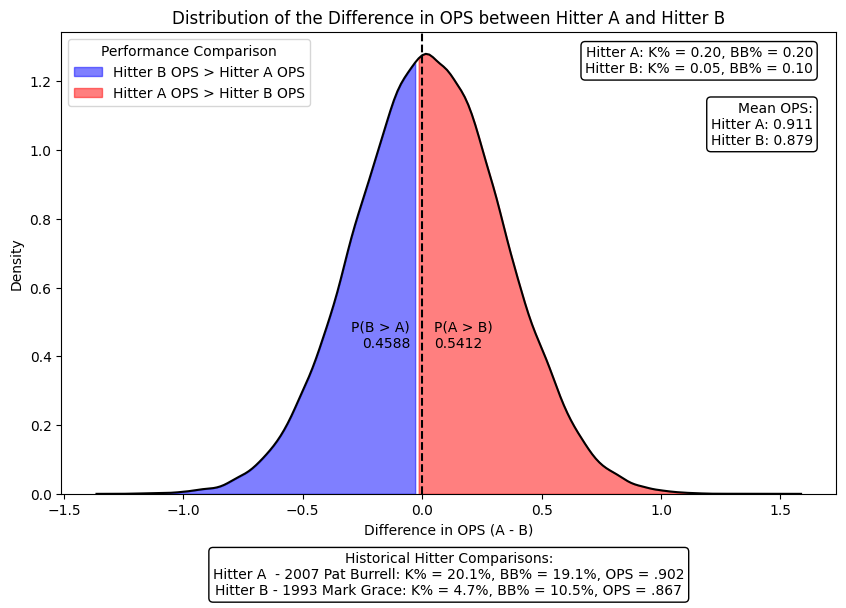

In [3]:

mean_ops_A = np.mean(A_OPS_sim)
mean_ops_B = np.mean(B_OPS_sim)
real_hitter_info = ("Historical Hitter Comparisons:\n"
                    "Hitter A  - 2007 Pat Burrell: K% = 20.1%, BB% = 19.1%, OPS = .902\n"
                    "Hitter B - 1993 Mark Grace: K% = 4.7%, BB% = 10.5%, OPS = .867")

plt.figure(figsize=(10, 6))

ops_difference = A_OPS_sim - B_OPS_sim 
# Plotting the KDE
kde = sns.kdeplot(ops_difference, color="black")

# Getting the values for the KDE plot
x, y = kde.lines[0].get_data()

# Splitting the data at zero
idx = np.argwhere(np.diff(np.sign(x))).flatten()

# Shading and annotating the areas
plt.fill_between(x[:idx[0]], y[:idx[0]], color="blue", alpha=0.5, label = "Hitter B OPS > Hitter A OPS")
plt.fill_between(x[idx[0]:], y[idx[0]:], color="red", alpha=0.5, label = "Hitter A OPS > Hitter B OPS")

# Annotations
plt.text(x=0.05, y=max(y)/3, s=f"P(A > B)\n{probability_A_higher:.4f}", horizontalalignment='left', color='black')
plt.text(x=-0.05, y=max(y)/3, s=f"P(B > A)\n{1 - probability_A_higher:.4f}", horizontalalignment='right', color='black')

plt.title("Distribution of the Difference in OPS between Hitter A and Hitter B")
plt.xlabel("Difference in OPS (A - B)")
plt.ylabel("Density")
plt.axvline(x=0, color='black', linestyle='--')  # Zero difference line
plt.legend(title="Performance Comparison", loc='upper left')

hitter_info = ("Hitter A: K% = 0.20, BB% = 0.20\n"
               "Hitter B: K% = 0.05, BB% = 0.10")
plt.annotate(hitter_info, xy=(0.97, 0.97), xycoords='axes fraction', horizontalalignment='right',
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
# Adding mean OPS information
mean_ops_info = (f"Mean OPS:\nHitter A: {mean_ops_A:.3f}\nHitter B: {mean_ops_B:.3f}")
plt.annotate(mean_ops_info, xy=(0.97, 0.85), xycoords='axes fraction', horizontalalignment='right',
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.annotate(real_hitter_info, xy=(0.5, -0.125), xycoords='axes fraction', horizontalalignment='center',
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))



plt.show()